<a href="https://colab.research.google.com/github/Nzaya/Handwritten-Digit-Recognition/blob/master/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Import necessary libraries

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [22]:
# the data, split between train and test sets

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [23]:
# Print shape

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


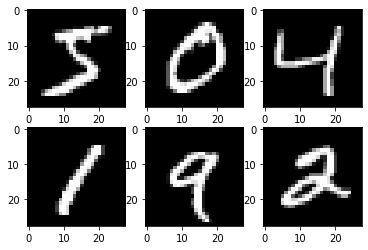

In [24]:
# PLot the first six samples of MNIST training dataset as gray scale image

import matplotlib.pyplot as plt
for i in range(6):
  plt.subplot(int('23' + str(i+1)))
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

# Data Processing

The dimension of the training data is (60000,28,28). The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1).

In [10]:
# Reshape to samples*pixels*width*height

x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
input_shape = (28,28,1)

In [11]:
# One Hot Encode
# We require all input and output variables to be numeric

y_train = keras.utils.to_categorical(y_train, num_classes = 10)
y_test = keras.utils.to_categorical(y_test, num_classes = 10)

In [12]:
# convert class vectors to binary class matrices

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


We need to normalize inputs from 0–255 to 0–1 as to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of value. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value

# Model

We will create our CNN Model because it generally consists of convolutional and pooling layers. It works better for data that are represented as grid structures, this is the reason why CNN works well for image classification problems. The dropout layer is used to deactivate some of the neurons and while training, it reduces offer fitting of the model. We will then compile the model with the Adadelta optimizer.

First, we define the model to be a sequential model. We stack Convolutional Layer and Pooling Layer on top of each other along with Dropout layer.

 Dropout layers provide a simple way to avoid overfitting by randomly dropping components of neural network (outputs) from a layer of neural network.

This results in a scenario where at each layer more neurons are forced to learn the multiple characteristics of the neural network. The last layer of the neural network will have number of node equal to the number of output class i.e. 10 and the activation function we will be using is “softmax”.

In [13]:
# Neural networks perform much better when the output label is fed as a sparse matrix 
#so we convert the y-label for both train and test data as a sparse matrix.

batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

# Train Model

In [14]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 [==============================] - 152s 325ms/step - loss: 2.2909 - accuracy: 0.1472 - val_loss: 2.2662 - val_accuracy: 0.3976
Epoch 2/10
469/469 [==============================] - 153s 326ms/step - loss: 2.2510 - accuracy: 0.2762 - val_loss: 2.2171 - val_accuracy: 0.6063
Epoch 3/10
469/469 [==============================] - 153s 326ms/step - loss: 2.1986 - accuracy: 0.4038 - val_loss: 2.1477 - val_accuracy: 0.7100
Epoch 4/10
469/469 [==============================] - 153s 325ms/step - loss: 2.1213 - accuracy: 0.4997 - val_loss: 2.0437 - val_accuracy: 0.7450
Epoch 5/10
469/469 [==============================] - 153s 325ms/step - loss: 2.0043 - accuracy: 0.5685 - val_loss: 1.8877 - val_accuracy: 0.7601
Epoch 6/10
469/469 [==============================] - 153s 326ms/step - loss: 1.8335 - accuracy: 0.6137 - val_loss: 1.6662 - val_accuracy: 0.7723
Epoch 7/10
469/469 [==============================] - 153s 326ms/step - loss: 1.6101 - accuracy: 0.6444 - val_loss: 1.3959 -

# Evaluate the Model

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7949094176292419
Test accuracy: 0.8288000226020813


# Create GUI to predict digits

The gradio library requires you to define 3 things: a prediction function, an input UI component, and an output UI component. In our case, we can use the built-in Sketchpad component for the input, and the Label component for the output (we’ll set up the Label to show the top 3 classes).

We also used live=True , which allows us to get real-time predictions from our model, and capture_session=True , which is needed for backwards compatibility for Tensorflow 1 (if you’re using Tensorflow 2, it doesn’t hurt to leave this line in).

In [16]:
!pip install gradio

In [17]:
import gradio as gr


In [18]:
def classify(image):
    prediction = model.predict(image).tolist()[0]
    return {str(i): prediction[i] for i in range(10)}

sketchpad = gr.inputs.Sketchpad()
label = gr.outputs.Label(num_top_classes=3)
Interface = gr.Interface(classify, sketchpad, label, live=True, capture_session = True)

In [19]:
Interface.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on External URL: https://40215.gradio.app
Interface loading below...


(<gradio.networking.serve_files_in_background.<locals>.HTTPServer at 0x7facdc203588>,
 'http://127.0.0.1:7861/',
 'https://40215.gradio.app')